# Tratamento dos Dados

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

base_original = pd.read_csv('financials.csv')

In [112]:
base_original.isnull().sum()

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
SEC Filings       0
dtype: int64

In [113]:
base_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          505 non-null    object 
 1   Name            505 non-null    object 
 2   Sector          505 non-null    object 
 3   Price           505 non-null    float64
 4   Price/Earnings  503 non-null    float64
 5   Dividend Yield  505 non-null    float64
 6   Earnings/Share  505 non-null    float64
 7   52 Week Low     505 non-null    float64
 8   52 Week High    505 non-null    float64
 9   Market Cap      505 non-null    float64
 10  EBITDA          505 non-null    float64
 11  Price/Sales     505 non-null    float64
 12  Price/Book      497 non-null    float64
 13  SEC Filings     505 non-null    object 
dtypes: float64(10), object(4)
memory usage: 55.4+ KB


In [114]:
base_modificada = base_original.copy() # Copiando a base_original pois quero ter a base_original sempre disponivel dentro do meu notebookb

In [115]:
base_numerica = base_original.copy() 

base_numerica=base_numerica.drop(['Symbol','Name','Sector','SEC Filings'],axis=1) # Apagando as variaveis do tipo objeto

In [116]:
base_numerica

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
0,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34
1,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35
2,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19
3,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14
4,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62
...,...,...,...,...,...,...,...,...,...,...
500,70.24,30.94,1.170079,1.83,76.81,46.860,1.291502e+10,7.220000e+08,2.726209,5.31
501,76.30,27.25,1.797080,4.07,86.93,62.850,2.700330e+10,2.289000e+09,6.313636,212.08
502,115.53,14.32,0.794834,9.01,133.49,108.170,2.445470e+10,2.007400e+09,3.164895,2.39
503,50.71,17.73,1.480933,2.60,55.61,38.430,1.067068e+10,0.000000e+00,3.794579,1.42


# Encontrando valores inconsistentes

**Antes de buscas inconsistentes é necessário entender o conceito de cada campo do dataframe**

### Entendo os indicadores

* <p>Price(Preço): Preço por ação da empresa<p/>   
* <p>Price to Earnings(Preço/lucro): Indica o preço de cada ação pelo lucro de cada ação ou seja P/E = Preço ÷ LPA
onde LPA= LPA = Lucro Líquido ÷ Quantidade de Ações em Circulação.<p/>
* <p> Dividend Yield(Rendimento do dividendo): valor dos proventos (dividendos ou JCPs) por ação ÷ cotação da ação × 100. <p/>
* <p> Earnings Per Share (Lucro por Ação): Lucro Liquido / Quantidade de Ações em circulação.<p/>
* <p> 52 week high and low(A alta e baixa de 52 semanas): A alta e a baixa anual do preço das ações de uma empresa no DataFrame ele ocupara dois campos que é o valor mais alto e o mais baixo que a ação obteve.<p/>
* <p> Market Cap(Valor de mercado):O valor de mercado das ações de uma empresa (calculado como preço da ação x número de ações)<p/>
* <p> EBITDA: Lucros antes de juros, impostos, depreciação e amortização <p/>
* <p> Price to Sales (Preço por venda): A capitalização de mercado de uma empresa dividida por suas vendas ou receitas totais no ano passado<p/>
* <p> Price to Book : Indicador calculado dividindo-se o Valor de Mercado da empresa por seu Patrimônio Líquido <p/>


### OBS: Após a pesquisa sobre os indicadores de ações foi possivel concluir que todos esses indicadores podem ser negativos ou nulos exceto o Price, Dividend Yield, 52 week high and low, Market Cap ou seja para esses campos que não permitem valores negativos e nulos qualquer valores do tipo serão considerados inconsistentes ou faltantes.
    





In [117]:
base_numerica.isnull().sum() # Nenhum valor faltante ou inconsistente para os campos que não permitem os mesmos

Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
dtype: int64

# Verificando se existe valores inconsistentes

In [118]:
base_numerica[base_numerica['Price'] < 0] # Nenhum valor inconsistente

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book


In [119]:
base_numerica[base_numerica['Dividend Yield']<0]  #Nenhum valor inconsistente

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book


In [120]:
base_numerica[base_numerica['52 Week Low']<0] #Nenhum valor inconsistente

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book


In [121]:
base_numerica[base_numerica['52 Week High']<0] #Nenhum valor inconsistente

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book


In [122]:
base_numerica[base_numerica['Market Cap']<0] # Nenhum valor  inconsistente

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book


# Verificando se existe valores faltantes

In [123]:
base_numerica.isnull().sum()

# Existem valores faltante no campo Price/Earnings e Price/Book 

Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
dtype: int64

In [124]:
base_numerica.loc[pd.isnull(base_numerica['Price/Book'])] # Encontrando qual registro tem os valores faltantes no campo Price/Book

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
55,24.45,20.21,0.956175,-0.21,31.17,21.755,1.212330e+10,1.517000e+09,0.942148,NaN
199,45.88,9.50,2.582795,4.91,77.86,28.420,5.819080e+09,9.570000e+08,1.036295,NaN
225,95.97,14.07,1.422764,5.94,106.84,71.180,3.444905e+10,8.202000e+09,0.725192,NaN
292,15.68,-32.00,1.224740,-2.65,19.52,10.550,1.387501e+10,2.266000e+09,4.657875,NaN
346,68.47,195.63,4.408186,-0.75,78.09,57.200,5.346769e+10,5.205000e+09,6.044895,NaN
358,110.15,21.51,2.837004,4.36,122.51,104.770,1.614133e+11,1.284300e+10,3.670506,NaN
450,283.00,23.76,0.000000,7.92,321.38,203.720,1.524120e+10,1.635916e+09,4.268832,NaN
460,124.86,22.06,2.062655,13.52,143.05,101.060,1.015133e+11,1.016900e+10,4.860507,NaN


In [125]:
base_numerica.loc[pd.isnull(base_numerica['Price/Earnings'])]

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
360,84.44,NaN,0.731261,-28.01,95.93,63.68,1.232638e+10,0.0,3.385007,2.03
430,48.85,NaN,0.000000,2.09,50.71,36.69,1.424720e+10,0.0,4.078549,4.35


# Substituindo esses valores pela média

In [126]:
# Substituindo valores faltantes pela media de cada campo especifico

base_numerica['Price/Earnings'].fillna(base_numerica['Price/Earnings'].mean(),inplace =True)
base_numerica['Price/Book'].fillna(base_numerica['Price/Book'].mean(),inplace=True)

base_numerica.isnull().sum()

# Todos os valores faltantes foram eliminados e substituindo

Price             0
Price/Earnings    0
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        0
dtype: int64

### Não foi encontrado nenhum valor inconsistente ou faltante 

# Vizualização

# Vizualizando a quantidade de empresas de cada setor

In [127]:
base_setores = base_original.copy()

base_setores = base_setores.groupby('Sector').count().reset_index()

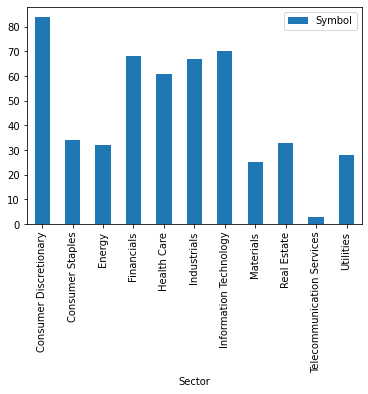

In [128]:
base_setores.plot.bar('Sector','Symbol')
plt.savefig('setores.png')

In [129]:
# Criar uma planilha do setor de Tecnologia e Energia e somar o market cap e ver qual o maior'

In [130]:
base_numerica['Name'] = base_original['Name']
base_numerica['Sector'] = base_original['Sector']

#base_numerica.insert(0,'Nome',base_original['Name'])

#base_numerica = base_numerica.reindex(columns=[]) # Essa forma é mais eficaz porém ela sempre que é executada tentará adicionar um campo novo e com isso ocorrerá sempre um erro

base_numerica = base_numerica.reindex(columns=['Name','Sector','Price','Price/Earnings','Dividend Yield','Earnings/Share','52 Week Low' ,'52 Week High','Market Cap','EBITDA','Price/Sales','Price/Book'])

base_numerica


,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
0,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34
1,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35
2,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19
3,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14
4,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62
...,...,...,...,...,...,...,...,...,...,...,...,...
500,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,1.291502e+10,7.220000e+08,2.726209,5.31
501,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,2.700330e+10,2.289000e+09,6.313636,212.08
502,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,2.445470e+10,2.007400e+09,3.164895,2.39
503,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,1.067068e+10,0.000000e+00,3.794579,1.42


In [131]:
base_ordenada = base_numerica.sort_values(by='Price')

base_ordenada

,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
104,Chesapeake Energy,Energy,2.82,4.70,0.000000,-6.44,6.590,2.8000,2.626102e+09,1.470000e+09,0.407652,1.84
10,AES Corp,Utilities,10.06,9.96,4.961832,-1.72,12.050,10.0000,6.920851e+09,3.001000e+09,0.659514,2.20
200,Ford Motor,Consumer Discretionary,10.43,5.89,6.784387,1.90,13.480,10.1900,4.241433e+10,9.281000e+09,0.270541,1.26
9,Advanced Micro Devices Inc,Information Technology,11.22,187.00,0.000000,0.03,15.650,9.7000,1.119166e+10,3.390000e+08,2.109196,21.47
459,Under Armour Class C,Consumer Discretionary,11.95,29.15,0.000000,0.45,21.805,10.3600,5.366629e+09,3.992770e+08,1.473879,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...
61,AutoZone Inc,Consumer Discretionary,718.57,16.31,0.000000,44.09,797.890,491.1300,1.992202e+10,2.347304e+09,1.851043,136.23
28,Alphabet Inc Class C,Information Technology,1001.52,40.29,0.000000,22.27,1186.890,803.1903,7.285356e+11,3.271400e+10,6.772653,4.67
27,Alphabet Inc Class A,Information Technology,1007.71,31.48,0.000000,22.27,1198.000,824.3000,7.338240e+11,3.421700e+10,6.801692,4.70
30,Amazon.com Inc,Consumer Discretionary,1350.50,296.16,0.000000,6.16,1498.000,812.5000,6.858734e+11,1.613200e+10,3.927053,24.28


In [132]:
#base_numerica['Appreciation'] = base_numerica['52 Week High'] - base_numerica['52 Week Low']

#base_numerica

## A subtração dos valores mais altos pelos mais baixos deram negativos ou seja se trata de um erro pois não tem como o maior valor de uma ação ser menor do que o valor mais baixo sendo que ambas estão no mesmo periodo de tempo.

## Exemplo: As Ações da 3M Company, O valor mais alto alcançado em 52 semanas de acordo com o atual campo "52 week high" foi 175.490 e o menor foi 259.77


## A partir disso foi possível concluir que os campos "52 week High" e "52 week low" estão trocados.

In [133]:
base_numerica.rename(columns={'52 Week High':'52 Week low'},inplace = True)
base_numerica.rename(columns={'52 Week Low':'52 Week high'},inplace = True)

In [134]:
base_numerica

,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week high,52 Week low,Market Cap,EBITDA,Price/Sales,Price/Book
0,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34
1,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35
2,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19
3,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14
4,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62
...,...,...,...,...,...,...,...,...,...,...,...,...
500,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,1.291502e+10,7.220000e+08,2.726209,5.31
501,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,2.700330e+10,2.289000e+09,6.313636,212.08
502,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,2.445470e+10,2.007400e+09,3.164895,2.39
503,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,1.067068e+10,0.000000e+00,3.794579,1.42


In [135]:
base_numerica['Appreciation'] = base_numerica['52 Week high'] - base_numerica['52 Week low']

base_numerica

,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week high,52 Week low,Market Cap,EBITDA,Price/Sales,Price/Book,Appreciation
0,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,84.280
1,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,19.465
2,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,22.320
3,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,65.810
4,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,47.780
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,1.291502e+10,7.220000e+08,2.726209,5.31,29.950
501,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,2.700330e+10,2.289000e+09,6.313636,212.08,24.080
502,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,2.445470e+10,2.007400e+09,3.164895,2.39,25.320
503,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,1.067068e+10,0.000000e+00,3.794579,1.42,17.180


In [136]:
# Top 10 ações mais baratas

base_top_maior = base_ordenada.sort_values(by='Price',ascending=False).head(10)
base_top_menor = base_ordenada.sort_values(by='Price',ascending=True).head(10)

base_top_menor

,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
104,Chesapeake Energy,Energy,2.82,4.70,0.000000,-6.44,6.590,2.800,2.626102e+09,1.470000e+09,0.407652,1.84
10,AES Corp,Utilities,10.06,9.96,4.961832,-1.72,12.050,10.000,6.920851e+09,3.001000e+09,0.659514,2.20
200,Ford Motor,Consumer Discretionary,10.43,5.89,6.784387,1.90,13.480,10.190,4.241433e+10,9.281000e+09,0.270541,1.26
9,Advanced Micro Devices Inc,Information Technology,11.22,187.00,0.000000,0.03,15.650,9.700,1.119166e+10,3.390000e+08,2.109196,21.47
459,Under Armour Class C,Consumer Discretionary,11.95,29.15,0.000000,0.45,21.805,10.360,5.366629e+09,3.992770e+08,1.473879,2.50
386,Range Resources Corp.,Energy,12.82,35.61,0.609756,-2.79,34.090,12.700,3.255588e+09,8.200950e+08,1.962434,0.59
458,Under Armour Class A,Consumer Discretionary,13.14,32.05,0.000000,0.45,23.460,11.400,5.856914e+09,3.992770e+08,1.602308,2.72
324,Navient,Financials,13.38,7.56,4.558404,1.01,16.970,11.481,3.692691e+09,0.000000e+00,0.698658,1.02
269,Kimco Realty,Real Estate,14.01,9.28,7.713499,0.80,25.150,14.330,6.180487e+09,7.011900e+08,7.050894,1.20
209,General Electric,Industrials,14.45,13.76,3.147541,-0.72,30.590,14.710,1.322493e+11,-2.060000e+08,1.088761,1.70


<AxesSubplot:xlabel='Name'>

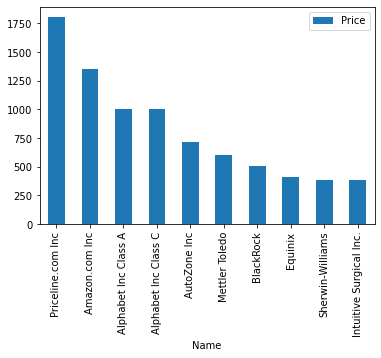

In [137]:
base_top_maior.plot.bar('Name','Price')

<AxesSubplot:xlabel='Name'>

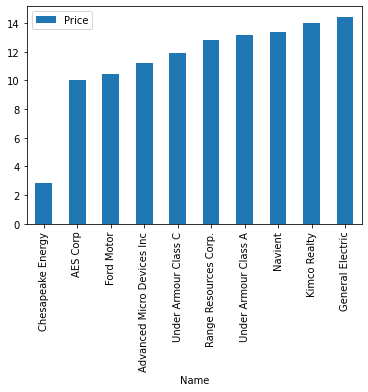

In [138]:
base_top_menor.plot.bar('Name','Price')

In [141]:
base_appreciation = base_numerica.sort_values(by='Appreciation',ascending=False).head(20)
base_appreciation

,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week high,52 Week low,Market Cap,EBITDA,Price/Sales,Price/Book,Appreciation
30,Amazon.com Inc,Consumer Discretionary,1350.50,296.16,0.000000,6.16,1498.0000,812.50000,6.858734e+11,1.613200e+10,3.927053,24.280000,685.50000
372,Priceline.com Inc,Consumer Discretionary,1806.06,24.26,0.000000,42.66,2067.9900,1589.00000,9.181745e+10,4.803487e+09,9.176564,6.920000,478.99000
28,Alphabet Inc Class C,Information Technology,1001.52,40.29,0.000000,22.27,1186.8900,803.19030,7.285356e+11,3.271400e+10,6.772653,4.670000,383.69970
27,Alphabet Inc Class A,Information Technology,1007.71,31.48,0.000000,22.27,1198.0000,824.30000,7.338240e+11,3.421700e+10,6.801692,4.700000,373.70000
61,AutoZone Inc,Consumer Discretionary,718.57,16.31,0.000000,44.09,797.8900,491.13000,1.992202e+10,2.347304e+09,1.851043,136.230000,306.76000
306,Mettler Toledo,Health Care,601.00,35.56,0.000000,14.24,697.2600,459.34000,1.642077e+10,6.667060e+08,8.372307,31.690000,237.92000
106,Chipotle Mexican Grill,Consumer Discretionary,266.01,45.86,0.000000,0.80,499.0000,263.00000,7.685284e+09,4.012930e+08,2.552385,6.110000,236.00000
73,BlackRock,Financials,509.38,22.49,2.164356,30.30,594.5200,368.00000,8.590776e+10,5.684000e+09,6.915820,2.950000,226.52000
392,Regeneron,Health Care,322.62,27.93,0.000000,7.74,543.5518,319.50000,3.595037e+10,2.043160e+09,8.485410,5.890000,224.05180
254,Intuitive Surgical Inc.,Health Care,381.87,48.58,0.000000,5.67,452.0000,233.10643,4.486662e+10,1.153700e+09,14.655261,9.480000,218.89357


<AxesSubplot:xlabel='Name'>

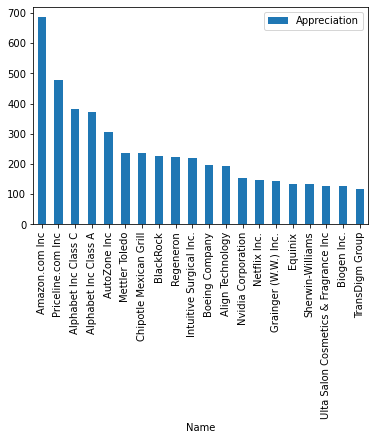

In [142]:
base_appreciation.plot.bar('Name','Appreciation')

Index(['Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week high', '52 Week low', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'Appreciation'],
      dtype='object')

In [156]:
base_tec = base_numerica.loc[base_numerica['Sector'] == 'Information Technology']
base_energ = base_numerica.loc[base_numerica['Sector']=='Energy']
base_finan = base_numerica.loc[base_numerica['Sector'] == 'Financials']

base_finan

,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week high,52 Week low,Market Cap,EBITDA,Price/Sales,Price/Book,Appreciation
12,Affiliated Managers Group Inc,Financials,179.11,12.24,0.638740,12.07,216.995,148.810,1.044217e+10,1.261400e+09,4.591235,2.89,68.185
13,AFLAC Inc,Financials,83.25,12.24,2.429907,11.01,91.730,68.800,3.342295e+10,0.000000e+00,1.542934,1.53,22.930
26,Allstate Corp,Financials,90.06,13.26,1.527821,4.68,105.360,77.730,3.475947e+10,0.000000e+00,1.208556,1.67,27.630
34,American Express Co,Financials,88.34,15.00,1.495567,2.90,102.385,75.510,8.041099e+10,0.000000e+00,2.273575,3.75,26.875
35,"American International Group, Inc.",Financials,58.28,23.22,2.116752,-0.76,67.300,57.850,5.436007e+10,0.000000e+00,1.468654,0.75,9.450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,Unum Group,Financials,47.87,11.51,1.818901,4.38,58.730,43.550,1.125643e+10,0.000000e+00,0.998492,1.19,15.180
485,Wells Fargo,Financials,55.40,13.58,2.711158,4.07,66.310,49.270,2.814636e+11,0.000000e+00,2.872819,1.58,17.040
493,Willis Towers Watson,Financials,152.36,18.67,1.347058,3.07,165.000,120.869,2.078027e+10,1.440000e+09,3.448466,2.10,44.131
499,XL Capital,Financials,41.26,-19.93,2.095238,-2.24,47.270,33.770,1.075342e+10,0.000000e+00,0.843942,0.97,13.500


In [158]:
base_tec.to_csv('base_tec.csv')
base_energ.to_csv('base_energ.csv')
base_finan.to_csv('base_finan.csv')
base_numerica.to_csv('base.csv')